In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib. pyplot as plt
import seaborn as sns
# !pip install japanize-matplotlib
import japanize_matplotlib
# import pandas_profiling as pdp

In [2]:
df = pd.read_csv('./input/train.csv')
# pdp.ProfileReport(df)

In [3]:
train = pd.read_csv('./input/train.csv')
test = pd.read_csv('./input/test.csv')
gender_submission = pd.read_csv('./input/gender_submission.csv')

In [4]:
print(train.shape) # 学習用データ
print(test.shape) # 本番予測用データ
print(gender_submission.shape) # 提出データサンプル

(891, 12)
(418, 11)
(418, 2)


In [5]:
print(train. columns) #トレーニングデータの列名

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [6]:
print(test. columns) # テストデータの列名

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [9]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [11]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

AgeとCabinに欠損が多い

In [13]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [14]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [15]:
df_full = pd.concat([train, test], axis = 0, sort = False)
print( df_full. shape)
df_full.describe()

(1309, 12)


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [16]:
df_full.describe(include='O')

,Name,Sex,Ticket,Cabin,Embarked
count,1309,1309,1309,295,1307
unique,1307,2,929,186,3
top,"Connolly, Miss. Kate",male,CA. 2343,C23 C25 C27,S
freq,2,843,11,6,914


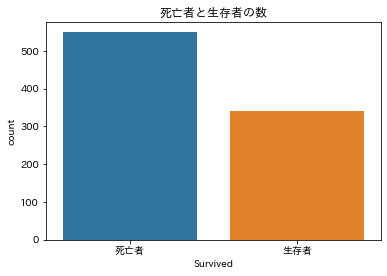

0    549
1    342
Name: Survived, dtype: int64

0    0.616162
1    0.383838
Name: Survived, dtype: float64

In [17]:
sns.countplot(x='Survived', data=train)
plt.title('死亡者と生存者の数')
plt.xticks([0, 1],['死亡者', '生存者'])
plt.show()

# 死亡者と生存者数を表示
display(train['Survived'].value_counts())

# 死亡者と生存者割合を表示
display(train['Survived'].value_counts()/len(train['Survived']))

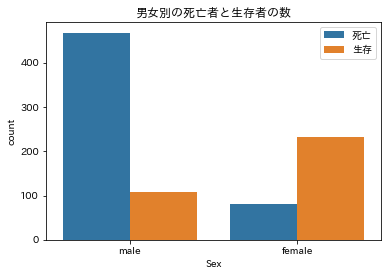

Survived,0,1
Sex,,
female,81,233
male,468,109


Survived,0,1
Sex,,
female,0.257962,0.742038
male,0.811092,0.188908


In [18]:
#男女別の生存者数の可視化
sns.countplot(x='Sex',hue='Survived',data=train)
plt.title('男女別の死亡者と生存者の数')
plt.legend(['死亡','生存'])
plt.show()

#SexとSurvivedをクロス集計
display(pd.crosstab(train['Sex'],train['Survived']))

#クロス集計しSexごとに正規化
display(pd.crosstab(train['Sex'],train['Survived'],normalize='index'))

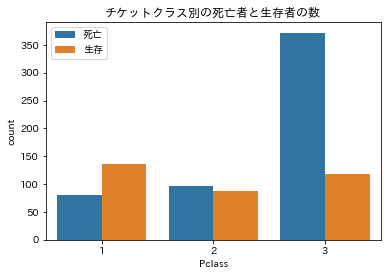

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


Survived,0,1
Pclass,,
1,0.370370,0.629630
2,0.527174,0.472826
3,0.757637,0.242363


In [19]:
#チケットクラス別の生存者数の可視化
sns.countplot(x='Pclass',hue='Survived',data=train)
plt.title('チケットクラス別の死亡者と生存者の数')
plt.legend(['死亡','生存'])
plt.show()

#PclassとSurvivedをクロス集計
display(pd.crosstab(train['Pclass'],train['Survived']))

#クロス集計しPclassごとに正規化
display(pd.crosstab(train['Pclass'],train['Survived'],normalize='index'))

C:\Users\juri\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


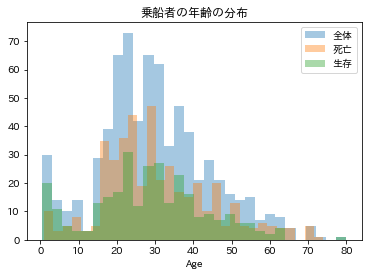

In [20]:
#全体のヒストグラム
sns.distplot(train['Age'].dropna(),kde=False,bins=30,label='全体')
#死亡者のヒストグラム
sns.distplot(train[train['Survived']==0].Age.dropna(),kde=False,bins=30,label='死亡')
#生存者のヒストグラム
sns.distplot(train[train['Survived']==1].Age.dropna(),kde=False,bins=30,label='生存')
#タイトルの表示
plt.title('乗船者の年齢の分布')
#凡例を表示
plt.legend()
plt.show()

10歳未満の乗客は死亡者よりも生存者の方が多い。
10代後半～30代は生存者より死亡者の方が多い。

In [21]:
# 敬称について
train['Name'][0:5]

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [22]:
#敬称を抽出。重複を省く。
set(train.Name.str.extract('([A-Za-z]+)\.',expand=False))

{'Capt',
 'Col',
 'Countess',
 'Don',
 'Dr',
 'Jonkheer',
 'Lady',
 'Major',
 'Master',
 'Miss',
 'Mlle',
 'Mme',
 'Mr',
 'Mrs',
 'Ms',
 'Rev',
 'Sir'}

In [23]:
#敬称をカウントする
train.Name.str.extract('([A-Za-z]+)\.',expand=False).value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Name, dtype: int64

In [24]:
#敬称をカウントする
test.Name.str.extract('([A-Za-z]+)\.',expand=False).value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: Name, dtype: int64

In [25]:
train['Title'] = train.Name.str.extract('([A-Za-z]+)\.',expand=False)
#trainのTitle列の値ごとに平均値を算出
train.groupby('Title').mean()['Age']

Title
Capt        70.000000
Col         58.000000
Countess    33.000000
Don         40.000000
Dr          42.000000
Jonkheer    38.000000
Lady        48.000000
Major       48.500000
Master       4.574167
Miss        21.773973
Mlle        24.000000
Mme         24.000000
Mr          32.368090
Mrs         35.898148
Ms          28.000000
Rev         43.166667
Sir         49.000000
Name: Age, dtype: float64

Masterは平均年齢が約4.6才と幼いため子供の敬称と考えられる

### 前処理

In [26]:
#敬称をカテゴリカル変数に変換するための関数
def title_to_num( title):
    if title == 'Master':
        return 1
    elif title == 'Miss':
        return 2
    elif title == 'Mr':
        return 3
    elif title == 'Mrs':
        return 4
    else:
        return 5
    
# testにもtitle列を作成
test['Title'] = test.Name.str.extract('([A-Za-z]+)\.',expand = False)
#リスト内包表記を用いて変換
train['Title_num'] = [title_to_num(i) for i in train['Title']]
test['Title_num'] = [title_to_num(i) for i in test['Title']]

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Title_num
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,4
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,4
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,3


In [27]:
# TitleごとのAgeの欠損値
print('Master', train[train['Title'] == 'Master'].loc[:, 'Age'].isnull().sum(), train[train['Title'] == 'Master'].loc[:, 'Age'].median())
print('Mr', train[train['Title'] == 'Mr'].loc[:, 'Age'].isnull().sum(), train[train['Title'] == 'Mr'].loc[:, 'Age'].median())
print('Mrs', train[train['Title'] == 'Mrs'].loc[:, 'Age'].isnull().sum(), train[train['Title'] == 'Mrs'].loc[:, 'Age'].median())
print('Miss', train[train['Title'] == 'Miss'].loc[:, 'Age'].isnull().sum(), train[train['Title'] == 'Miss'].loc[:, 'Age'].median())
print('Other', train[train['Title_num'] == 5].loc[:, 'Age'].isnull().sum(), train[train['Title_num'] == 5].loc[:, 'Age'].median())

Master 4 3.5
Mr 119 30.0
Mrs 17 35.0
Miss 36 21.0
Other 1 44.5


C:\Users\juri\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\juri\anaconda3\lib\site-packages\seaborn\distributions.py:2657: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
C:\Users\juri\anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


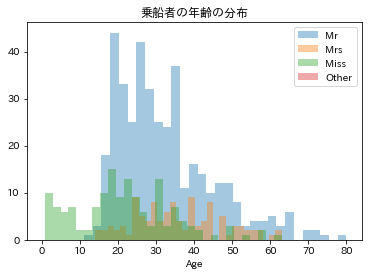

In [28]:
# Mrのヒストグラム
sns.distplot(train[train['Title'] == 'Mr'].loc[:, 'Age'].dropna(),kde=False,bins=30,label='Mr')
# Mrsのヒストグラム
sns.distplot(train[train['Title'] == 'Mrs'].loc[:, 'Age'].dropna(),kde=False,bins=30,label='Mrs')
# Missのヒストグラム
sns.distplot(train[train['Title'] == 'Miss'].loc[:, 'Age'].dropna(),kde=False,bins=30,label='Miss')
# そのほかの敬称のヒストグラム
sns.distplot(train[train['Title_num'] == '5'].loc[:, 'Age'].dropna(),kde=False,bins=30,label='Other')
#タイトルの表示
plt.title('乗船者の年齢の分布')
#凡例を表示
plt.legend()
plt.show()

In [29]:
# トレインデータについて、
# Materの欠損値を埋める
train.loc[train['Title'] == 'Master', 'Age'] = train.loc[train['Title'] == 'Master', 'Age'].fillna(train.loc[train['Title'] == 'Master', 'Age'].median())
# Mrの欠損値を埋める
train.loc[train['Title'] == 'Mr', 'Age'] = train.loc[train['Title'] == 'Mr', 'Age'].fillna(train.loc[train['Title'] == 'Mr', 'Age'].median())
# Mrsの欠損値を埋める
train.loc[train['Title'] == 'Mrs', 'Age'] = train.loc[train['Title'] == 'Mrs', 'Age'].fillna(train.loc[train['Title'] == 'Mrs', 'Age'].median())
# Missの欠損値を埋める
train.loc[train['Title'] == 'Miss', 'Age'] = train.loc[train['Title'] == 'Miss', 'Age'].fillna(train.loc[train['Title'] == 'Miss', 'Age'].median())
# その他の欠損値を埋める
train.loc[train['Title_num'] == 5, 'Age'] = train.loc[train['Title_num'] == 5, 'Age'].fillna(train.loc[train['Title_num'] == 5, 'Age'].median())

In [30]:
# テストデータについて、
# Materの欠損値を埋める
test.loc[test['Title'] == 'Master', 'Age'] = test.loc[test['Title'] == 'Master', 'Age'].fillna(test.loc[test['Title'] == 'Master', 'Age'].median())
# Mrの欠損値を埋める
test.loc[test['Title'] == 'Mr', 'Age'] = test.loc[test['Title'] == 'Mr', 'Age'].fillna(test.loc[test['Title'] == 'Mr', 'Age'].median())
# Mrsの欠損値を埋める
test.loc[test['Title'] == 'Mrs', 'Age'] = test.loc[test['Title'] == 'Mrs', 'Age'].fillna(test.loc[test['Title'] == 'Mrs', 'Age'].median())
# Missの欠損値を埋める
test.loc[test['Title'] == 'Miss', 'Age'] = test.loc[test['Title'] == 'Miss', 'Age'].fillna(test.loc[test['Title'] == 'Miss', 'Age'].median())
# その他の欠損値を埋める
test.loc[test['Title_num'] == 5, 'Age'] = test.loc[test['Title_num'] == 5, 'Age'].fillna(test.loc[test['Title_num'] == 5, 'Age'].median())

In [31]:
#不要な列の削除
train.drop(['PassengerId', 'Name','Cabin', 'Ticket', 'Embarked', 'Title'],axis=1,inplace=True)
#trainの表示
display(train.head())

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Title_num
0,0,3,male,22.0,1,0,7.2500,3
1,1,1,female,38.0,1,0,71.2833,4
2,1,3,female,26.0,0,0,7.9250,2
3,1,1,female,35.0,1,0,53.1000,4
4,0,3,male,35.0,0,0,8.0500,3


In [32]:
#不要な列の削除
test.drop(['PassengerId', 'Name','Cabin', 'Ticket', 'Embarked', 'Title'],axis=1,inplace=True)
#trainの表示
display(test.head())

,Pclass,Sex,Age,SibSp,Parch,Fare,Title_num
0,3,male,34.5,0,0,7.8292,3
1,3,female,47.0,1,0,7.0000,4
2,2,male,62.0,0,0,9.6875,3
3,3,male,27.0,0,0,8.6625,3
4,3,female,22.0,1,1,12.2875,4


In [33]:
label = train['Survived'] # labelはtrainのSurvived列
train.drop(["Survived"], axis=1, inplace=True)

In [34]:
train.shape
train.dtypes

Pclass         int64
Sex           object
Age          float64
SibSp          int64
Parch          int64
Fare         float64
Title_num      int64
dtype: object

In [35]:
cat_feat = ["Pclass", "Sex", "Title_num"]
for i in cat_feat :
    train[i] = train[i].astype("category")
    test[i] = test[i].astype("category")

In [36]:
train.shape
# train.dtypes

(891, 7)

In [37]:
test.shape
# test.dtypes

(418, 7)

In [38]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# X_trainとy_trainをtrainとvalidに分割
X_train, X_valid, y_train, y_valid = train_test_split(train, label)
#lgb.Datasetでtrainとvalidを作っておく
lgb_train = lgb.Dataset(X_train, y_train, categorical_feature=cat_feat)
lgb_eval = lgb.Dataset(X_valid, y_valid, reference=lgb_train, categorical_feature=cat_feat)

params = {
    "objective" : "binary",
    "metric" : "binary_logloss",
    "early_stopping_round" : 10
}

In [39]:
evals_result = {}
model = lgb.train(params, lgb_train, valid_sets=[lgb_train, lgb_eval], evals_result = evals_result)

[LightGBM] [Info] Number of positive: 251, number of negative: 417
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000148 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 196
[LightGBM] [Info] Number of data points in the train set: 668, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.375749 -> initscore=-0.507633
[LightGBM] [Info] Start training from score -0.507633
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	training's binary_logloss: 0.614454	valid_1's binary_logloss: 0.638868
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2]	training's binary_logloss: 0.575167	valid_1's binary_logloss: 0.608102
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3]	training's binary_logloss: 0.543106	valid_1's binary_logloss: 0.580298


C:\Users\juri\anaconda3\lib\site-packages\lightgbm\basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
C:\Users\juri\anaconda3\lib\site-packages\lightgbm\engine.py:260: UserWarning: 'evals_result' argument is deprecated and will be removed in a future release of LightGBM. Pass 'record_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'evals_result' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\juri\anaconda3\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\juri\anaconda3\lib\site-packages\lightgbm\basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


In [40]:
val_pred = model.predict(X_valid, num_iteration=model.best_iteration)
val_pred

array([0.96467532, 0.72184332, 0.1778805 , 0.01799696, 0.49716745,
       0.06125986, 0.14354016, 0.09598743, 0.20415557, 0.23027267,
       0.72076043, 0.03786457, 0.09560249, 0.88864166, 0.78235761,
       0.94287646, 0.27753482, 0.06926584, 0.72184332, 0.03786457,
       0.08655836, 0.83873794, 0.11542364, 0.06122697, 0.19784007,
       0.51717871, 0.08194861, 0.19778564, 0.02111089, 0.19675469,
       0.49425145, 0.89347171, 0.60762497, 0.07858682, 0.06408812,
       0.07109401, 0.85674598, 0.19169627, 0.12162593, 0.68880875,
       0.63985454, 0.07827715, 0.86801337, 0.17428437, 0.095085  ,
       0.40017334, 0.02111683, 0.07858682, 0.64742336, 0.8031961 ,
       0.05690631, 0.53711719, 0.12397559, 0.15122382, 0.15008752,
       0.21447399, 0.05795073, 0.93225761, 0.02294539, 0.96141185,
       0.97371683, 0.91121934, 0.86566262, 0.96911368, 0.05653998,
       0.02111089, 0.47659644, 0.85271298, 0.1081303 , 0.02759249,
       0.07369058, 0.09077536, 0.37515406, 0.37105143, 0.75227

In [41]:
val_pred = np.where(val_pred < 0.5, 0, 1)
acc = accuracy_score(y_valid, val_pred)
acc

0.8161434977578476

In [42]:
test_pred = model.predict(test, num_iteration=model.best_iteration)
test_pred = np.where(test_pred < 0.5, 0, 1)
test_pred

array([0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [43]:
sub = pd.read_csv("./input/gender_submission.csv")

In [44]:
sub.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [45]:
sub["Survived"] = test_pred
sub

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [46]:
sub.to_csv("./output/submission_20220523_05.csv", index=False)

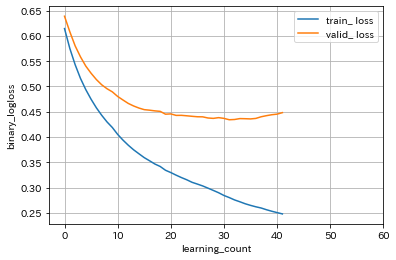

In [47]:
fig = plt.figure()

# x方向のラベルを指定
plt.xlabel("learning_count")
# y方向のラベルを指定
plt.ylabel("binary_logloss")
# グラフの表示範囲を指定
plt.xlim(-3, 60)
# グリッドを表示
plt.grid()

plt.plot(evals_result['training']['binary_logloss'], label ='train_ loss')
plt.plot(evals_result['valid_1']['binary_logloss'], label ='valid_ loss')

plt.legend()
fig.savefig("./output/learning_curve/sub05.png", dpi=fig.dpi, bbox_inches='tight')